# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [2]:
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

In [3]:
# Your Code Here
print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')
print("Min pixel value in x_train:", x_train.min())
print("Max pixel value in x_train:", x_train.max())
print("Min pixel value in x_test:", x_test.min())
print("Max pixel value in x_test:", x_test.max())
print(f'Number of classes: {len(class_names)}')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)
Min pixel value in x_train: 0
Max pixel value in x_train: 255
Min pixel value in x_test: 0
Max pixel value in x_test: 255
Number of classes: 100


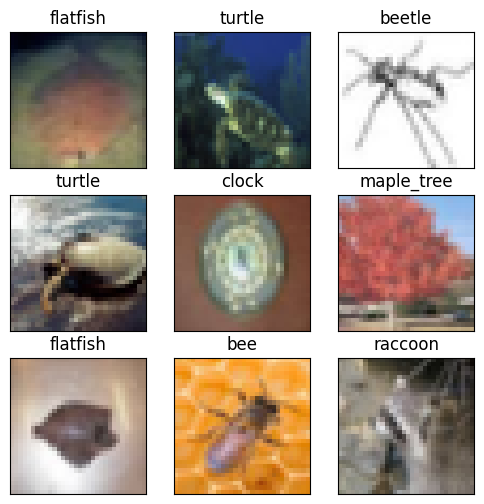

In [4]:
import matplotlib.pyplot as plt
import numpy as np
# Selecting 9 random indices
random_indices = np.random.choice(len(x_train), 9, replace=False)

# Creating a 3x3 grid plot
fig, axes = plt.subplots(3, 3, figsize=(6, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[random_indices[i]])
    ax.set_title(class_names[y_train[random_indices[i], 0]])

    # Removing axis labels
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

### 1b: Data Preprocessing
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [5]:
# Your Code Here
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Normalize
x_train_scaled = x_train / 255.0
x_test_scaled = x_test / 255.0

# One-hot encoded vectors
y_train_encoded = to_categorical(y_train, num_classes=100)
y_test_encoded = to_categorical(y_test, num_classes=100)

# Split the training set into training and validation sets
X_train, X_valid, Y_train, Y_valid = train_test_split(
    x_train_scaled, y_train_encoded, test_size=0.2, random_state=37
)

## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [16]:
# Your Code Here
from tensorflow.keras import layers, models

model = models.Sequential()


model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation = 'relu'))
model.add(layers.Dense(100, activation = 'softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          10,100 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 731,096 (2.79 MB)

 Trainable params: 731,096 (2.79 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> categorical_crossentropy. Because we're working on multiple class classification problem.
- <b>Optimizer:</b> Adam because it adjusts the learning rate automatically

In [17]:
# Your Code Here
model.compile(
    loss='categorical_crossentropy', # Loss function
    optimizer='adam', # Optimizer
    metrics=['accuracy'] # Metrics to evaluate the model
)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [18]:
# Your Code Here
history = model.fit(
    X_train, # Training data
    Y_train, # Training labels
    epochs=50, # Seems like validation accuracy and loss worsen while training accuracy and loss improve after epochs 10. So it might be a sign of model overfitting after epochs 10
    batch_size=32, # Number of samples per batch
    validation_data=(X_valid, Y_valid) # Use 20% of the data for validation
)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0626 - loss: 4.2489 - val_accuracy: 0.1738 - val_loss: 3.4746
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1965 - loss: 3.3549 - val_accuracy: 0.2275 - val_loss: 3.2094
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2553 - loss: 3.0546 - val_accuracy: 0.2470 - val_loss: 3.1165
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2861 - loss: 2.8865 - val_accuracy: 0.2508 - val_loss: 3.0690
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3145 - loss: 2.7428 - val_accuracy: 0.2705 - val_loss: 2.9691
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3279 - loss: 2.6517 - val_accuracy: 0.2863 - val_loss: 2.9099
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3444 - loss: 2.5622 - val_accuracy: 0.2871 - val_loss: 2.9237
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3642 - loss: 2.4808 - 

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> Measures the proportion of correct predictions. (TP + TN) / (TP +FN +TN + FP)
- <b>Other metric:</b>
Precision: Measures the proportion of positive predictions that are actually correct. It's useful when false positives are critical. (TP)/(TP+FP)
Recall: Measures the proportion of actual positives that the model correctly predicted. It is important when false negatives are critical. (TP) / (TP + FN)
- <b>Reason for selection:</b> They are key metrics for evaluating classification problem.
- <b>Value of metric:</b>
Loss:     5.68
Accuracy: 24.05%
Precision: 0.24
Recall:    0.24
- <b>Interpretation of metric value:</b> The model is under-performing with only around 26% accuracy and precision and recall score.

In [19]:
# Your Code Here
from sklearn.metrics import precision_score, recall_score
loss, accuracy = model.evaluate(x_test_scaled, y_test_encoded)

# Predict classes
y_pred = model.predict(x_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall:    {recall:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2398 - loss: 5.6988
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Loss:     5.68
Accuracy: 24.05%
Precision: 0.24
Recall:    0.24


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

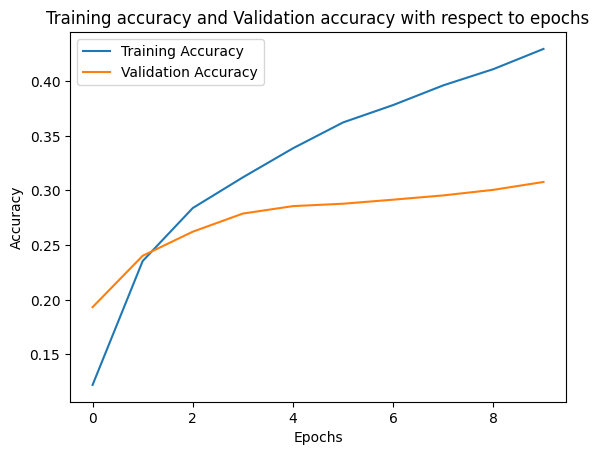

In [10]:
# Your Code Here
plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Training accuracy and Validation accuracy with respect to epochs")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


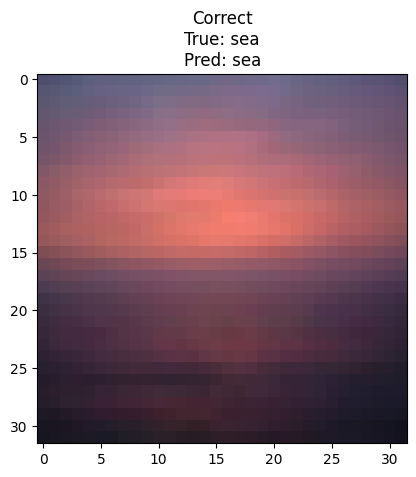

Correct Image Probabilities:
[5.97000541e-03 1.89843273e-03 2.11112062e-03 1.38867599e-05
 1.63954587e-06 7.32716944e-05 4.07206107e-06 1.01231912e-07
 5.61442137e-09 2.64554310e-05 1.99339236e-03 1.75371347e-03
 3.58972443e-06 5.99999282e-07 2.25571426e-07 1.21848207e-05
 6.32679657e-05 3.20457683e-09 8.50144934e-05 2.21562568e-05
 8.17960026e-05 2.46412206e-08 1.12399011e-05 2.48896927e-01
 7.96869870e-07 7.05088396e-03 4.74000699e-05 9.06173591e-06
 7.93276631e-05 4.19311817e-07 1.97748022e-07 1.44302792e-09
 2.05082372e-02 1.63525401e-05 2.27333672e-07 7.16074428e-04
 1.29234331e-05 1.70202030e-11 1.16349383e-08 1.32458151e-08
 9.57176380e-04 4.27759278e-06 4.11497219e-08 3.45460853e-06
 1.98413163e-05 2.02684678e-04 1.21208867e-02 3.27344798e-02
 8.99943515e-08 1.11791817e-02 2.26137914e-07 1.09972447e-04
 3.67129331e-08 1.18056378e-04 1.19543523e-02 8.02504564e-06
 5.28784003e-05 4.96053508e-05 2.94844667e-05 1.53475703e-05
 6.44300580e-02 5.10045584e-06 1.26613793e-03 1.62878777

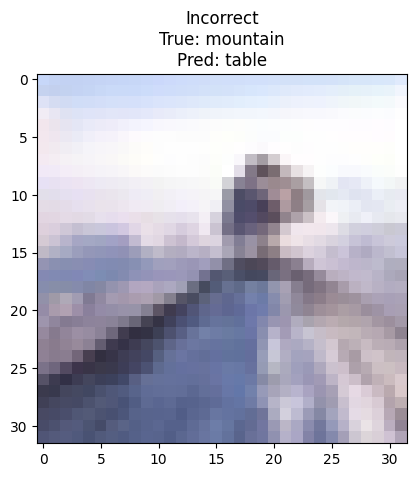

In [24]:
import matplotlib.pyplot as plt


y_pred_probs = model.predict(x_test_scaled)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)

# Plot for image that the model correctly classified in the test set and report the model's classification probabilities
correct_indices = np.where(y_pred_classes == y_true_classes)[0]

plt.imshow(x_test[correct_indices[0]], cmap="gray")
plt.title(f"Correct\nTrue: {class_names[y_true_classes[correct_indices[0]]]}\nPred: {class_names[y_pred_classes[correct_indices[0]]]}")

plt.show()

print(f"Correct Image Probabilities:\n{y_pred_probs[correct_indices[0]]}\n")

# Plot for image that the model incorrectly classified in the test set and report the model's classification probabilities

incorrect_indices = np.where(y_pred_classes != y_true_classes)[0]

plt.imshow(x_test[incorrect_indices[0]], cmap="gray")
plt.title(f"Incorrect\nTrue: {class_names[y_true_classes[incorrect_indices[0]]]}\nPred: {class_names[y_pred_classes[incorrect_indices[0]]]}")

print(f"Incorrect Image Probabilities:\n{y_pred_probs[incorrect_indices[0]]}\n")


## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
I added more layers to allow the model learn to learn more complex patterns and extract more detailed features. Besides, I added dropout to helps in preventing overfitting. I also reduce the learning rate if the validation accuracy stops improving. I  implemented EarlyStopping to stop training when the model's validation accuracy stops improving.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.
The hyperparameters values was picked was based on common setup and examined by running the models with different combintations.

In [20]:
# Final Model
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator


new_model = models.Sequential()

new_model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
new_model.add(layers.BatchNormalization())
new_model.add(layers.MaxPooling2D((2, 2)))
new_model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
new_model.add(layers.BatchNormalization())
new_model.add(layers.MaxPooling2D((2, 2)))
new_model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
new_model.add(layers.BatchNormalization())


# Added  Layer
new_model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))  # New layer with 256 filters
new_model.add(layers.BatchNormalization())
new_model.add(layers.MaxPooling2D((2, 2)))


new_model.add(layers.Flatten())
new_model.add(layers.Dense(128, activation='relu'))

# Added Dropout
new_model.add(layers.Dropout(0.2))
new_model.add(layers.Dense(100, activation='softmax'))

# Print model summary
new_model.summary()

# Compile the model
new_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Reduce learning rate when a metric has stopped improving.
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5,
                              patience=3)

# EarlyStopping callback setup
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,               # Stop if no improvement after 5 epochs
    restore_best_weights=True # Restore best model weights
)

# data augmentation to helps prevent overfitting and helps the model generalize better
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          12,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 927,652 (3.54 MB)

 Trainable params: 926,692 (3.54 MB)

 Non-trainable params: 960 (3.75 KB)

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [21]:
# Train the model
new_history = new_model.fit(
    datagen.flow(X_train, Y_train, batch_size=128),
    epochs=50,
    validation_data=(X_valid, Y_valid),
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 99ms/step - accuracy: 0.0391 - loss: 4.5006 - val_accuracy: 0.0351 - val_loss: 4.5643 - learning_rate: 0.0010
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - accuracy: 0.1059 - loss: 3.8537 - val_accuracy: 0.1496 - val_loss: 3.5706 - learning_rate: 0.0010
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step - accuracy: 0.1548 - loss: 3.5012 - val_accuracy: 0.2188 - val_loss: 3.1402 - learning_rate: 0.0010
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step - accuracy: 0.1903 - loss: 3.2835 - val_accuracy: 0.2109 - val_loss: 3.2587 - learning_rate: 0.0010
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - accuracy: 0.2216 - loss: 3.1158 - val_accuracy: 0.2863 - val_loss: 2.8189 - learning_rate: 0.0010
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 73ms/step - accuracy: 0.2458 - loss: 2.9819 - val_accuracy: 0.3049 - val_loss: 2.7210 - learning_rate: 0.0010
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 76ms/step - accuracy: 0.2747 - loss: 2.8322

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5432 - loss: 1.7694
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Loss:     1.78
Accuracy: 54.03%
Precision: 0.54
Recall:    0.54


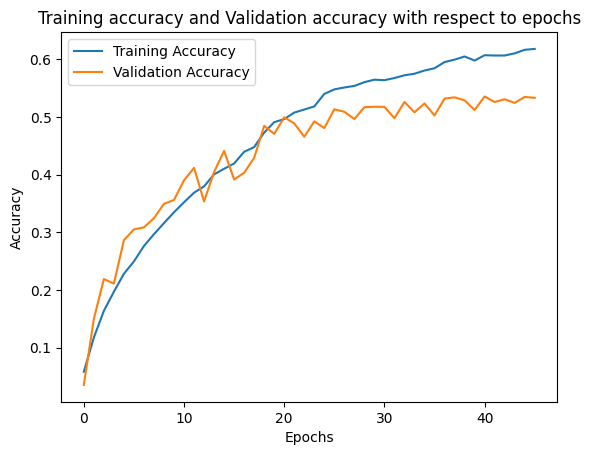

In [22]:
# Predict classes
loss, accuracy = new_model.evaluate(x_test_scaled, y_test_encoded)
y_pred = new_model.predict(x_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')
print(f'Precision: {precision:.2f}')
print(f'Recall:    {recall:.2f}')

plt.plot(new_history.history['accuracy'], label="Training Accuracy")
plt.plot(new_history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Training accuracy and Validation accuracy with respect to epochs")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


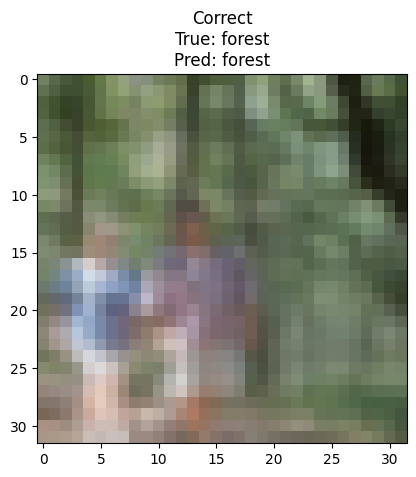

Correct Image Probabilities:
[7.67849173e-10 6.71939142e-06 8.01901842e-05 4.75465436e-04
 1.38645046e-04 1.18404896e-05 5.16656692e-05 2.60816323e-05
 4.64923214e-03 2.56487960e-03 1.09451503e-05 1.49170082e-05
 1.28061464e-03 3.54322692e-05 1.48951594e-05 4.21354314e-04
 1.23680438e-04 6.15253637e-04 3.05898441e-03 1.83033102e-04
 2.50789299e-06 3.19938001e-04 9.40489583e-04 1.19789940e-04
 6.86044928e-07 5.66997114e-05 8.70127951e-06 4.78352968e-06
 8.90963747e-06 1.34574913e-03 3.51071776e-07 2.11134739e-03
 1.13468659e-05 8.48893762e-01 1.93787011e-04 4.26160725e-04
 2.92802270e-06 4.54287156e-02 3.95649439e-03 1.29327118e-05
 9.53594281e-05 3.65892902e-06 1.23639521e-03 6.01470892e-05
 1.34221900e-05 5.91456890e-04 5.31633559e-05 2.56113381e-05
 5.78025792e-05 3.97749136e-06 2.96434038e-04 1.16430601e-04
 4.48331521e-05 8.64632393e-11 3.32633067e-06 1.10547800e-04
 2.27152975e-03 7.05501043e-06 6.53466600e-07 2.95174047e-02
 4.43739196e-07 3.28114720e-06 3.92932242e-10 1.20794764

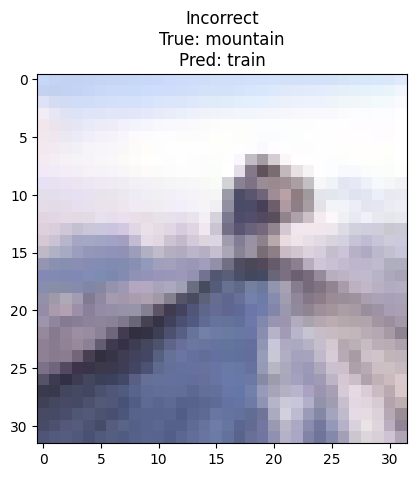

In [23]:
y_pred_probs = new_model.predict(x_test_scaled)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)

# Plot for image that the model correctly classified in the test set and report the model's classification probabilities
correct_indices = np.where(y_pred_classes == y_true_classes)[0]

plt.imshow(x_test[correct_indices[0]], cmap="gray")
plt.title(f"Correct\nTrue: {class_names[y_true_classes[correct_indices[0]]]}\nPred: {class_names[y_pred_classes[correct_indices[0]]]}")

plt.show()

print(f"Correct Image Probabilities:\n{y_pred_probs[correct_indices[0]]}\n")

# Plot for image that the model incorrectly classified in the test set and report the model's classification probabilities

incorrect_indices = np.where(y_pred_classes != y_true_classes)[0]

plt.imshow(x_test[incorrect_indices[0]], cmap="gray")
plt.title(f"Incorrect\nTrue: {class_names[y_true_classes[incorrect_indices[0]]]}\nPred: {class_names[y_pred_classes[incorrect_indices[0]]]}")

print(f"Incorrect Image Probabilities:\n{y_pred_probs[incorrect_indices[0]]}\n")


### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here
The validation accuracy is around 55%. And the testing accuracy, the precision and recall are around 55% and 54%. So the model performance does improve. I think the new techniques applied and tuning the hyperparameters helped generalize the model for better fit and prevent overfit. I think i can try further tuning the hyperparameters if i have more computing power to try with different hyperparameters combinations.  

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.